# Data selection

Juan Navarro, <jsnavarroa@unal.edu.co>

-------------------------------


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [5]:
download_path = os.path.abspath("./data")

## 1. Download the data

Use Selenium to download all the data.

In [37]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException

chrome_options = webdriver.chrome.options.Options()  
#chrome_options.add_argument("--headless")
prefs = {"download.default_directory" : download_path}
chrome_options.add_experimental_option("prefs",prefs)

browser = webdriver.Chrome(chrome_options=chrome_options)
browser.implicitly_wait(30)

def is_element_present(how, what):
    try: 
        browser.find_element(by=how, value=what)
    except NoSuchElementException as e: 
        return False
    return True

def waitForElementPresent(how, what):
    for i in range(60):
        if is_element_present(how, what): 
                break
        time.sleep(1)

# Get the page
browser.get("https://www.superfinanciera.gov.co/ReporteInformacionFIC/faces/reporte/consultaReporte.xhtml")
# Select the search by name
browser.find_element_by_xpath("//table[@id='formaDatosReporte:tipoBusqueda']/tbody/tr/td[3]/div/div[2]/span").click()
# Wait for name field
waitForElementPresent(By.ID, "formaDatosReporte:nombreEntidadInput_input")
# Write name
browser.find_element_by_id("formaDatosReporte:nombreEntidadInput_input").send_keys("FIDUCIARIA BANCOLOMBIA S.A.")
# Accept the first suggestion
browser.find_element_by_xpath("//div[@id='formaDatosReporte:nombreEntidadInput_panel']/ul/li/span").click()
# Write initial date
browser.find_element_by_id("formaDatosReporte:fechaReporteInicial_input").send_keys("01/01/2018")
# Write final date
browser.find_element_by_id("formaDatosReporte:fechaReporteFinal_input").send_keys("28/05/2018")
# Begin the search
browser.find_element_by_xpath("//button[@id='formaDatosReporte:cmdReporte']/span").click()

while(True):
    # Download report
    browser.find_element_by_xpath("//button[@id='formaResultadoRentabilidad:j_id_1u']/span[2]").click()
    # Go to next report page
    paginator = browser.find_element_by_xpath("//div[@id='formaResultadoRentabilidad:tblResultadoReporte_paginator_bottom']/span[4]")
    paginator.click()
    if "ui-state-disabled" in paginator.get_attribute("class"):
        break
    time.sleep(1)

## 2. Combine all the data in one DataFrame

In [6]:
import pandas as pd
import glob

report = pd.DataFrame()

# Go to download path and read all files
retval = os.getcwd()
os.chdir(download_path)
for file in glob.glob("reporteRentabilidades*.xls"):
    print(file)
    df = pd.read_excel(file)
    report = report.append(df)

os.chdir(retval)

report.head()

reporteRentabilidades (21).xls
reporteRentabilidades (19).xls
reporteRentabilidades (17).xls
reporteRentabilidades (11).xls
reporteRentabilidades (9).xls
reporteRentabilidades (20).xls
reporteRentabilidades3.xls
reporteRentabilidades (16).xls
reporteRentabilidades (14).xls
reporteRentabilidades (12).xls
reporteRentabilidades (2).xls
reporteRentabilidades7.xls
reporteRentabilidades (7).xls
reporteRentabilidades.xls
reporteRentabilidades (22).xls
reporteRentabilidades5.xls
reporteRentabilidades (13).xls
reporteRentabilidades (15).xls
reporteRentabilidades (1).xls
reporteRentabilidades6.xls
reporteRentabilidades (6).xls
reporteRentabilidades (10).xls
reporteRentabilidades4.xls
reporteRentabilidades2.xls
reporteRentabilidades (18).xls
reporteRentabilidades (4).xls
reporteRentabilidades (5).xls
reporteRentabilidades (8).xls
reporteRentabilidades (3).xls


,Fecha corte,Tipo Entidad,Cód. Entidad,Nombre Entidad,Cód. Negocio,Nombre Negocio,Subtipo Negocio,Principal / Compart.,Tipo Part. <sup>1<sup/>,Cons. id Part.,Núm. unidades,Valor unidad para las operaciones del día t,Valor fondo al cierre del día t,Núm. Invers.,Rentab. dia,Rentab. mes,Rentab. sem,Rentab. año
0,17/05/2018,5,31,Fiduciaria Bancolombia S.A.,2852,FONDO DE INVERSIÓN COLECTIVA ABIERTO FIDUCUENTA,FIC DE TIPO GENERAL,Principal,8,0,"452,507,103.196","$28,221.86","$12,744,114,101,089.96",508931,-0.599587,3.889072,4.289981,4.618381
1,17/05/2018,5,31,Fiduciaria Bancolombia S.A.,2971,FONDO DE INVERSION COLECTIVA ABIERTO CON PACTO...,FIC DE TIPO GENERAL,Principal,5,3,"5,771,372.074","$31,116.57","$179,530,553,667.53",3130,-2.905855,4.276349,5.514208,5.540099
2,17/05/2018,5,31,Fiduciaria Bancolombia S.A.,2971,FONDO DE INVERSION COLECTIVA ABIERTO CON PACTO...,FIC DE TIPO GENERAL,Principal,5,4,"961,910.278","$31,268.00","$29,993,458,447.71",1212,-2.521080,4.343580,5.596407,5.622093
3,17/05/2018,5,31,Fiduciaria Bancolombia S.A.,2971,FONDO DE INVERSION COLECTIVA ABIERTO CON PACTO...,FIC DE TIPO GENERAL,Principal,5,5,"405,520.967","$31,801.93","$12,927,749,911.16",356,-2.833666,4.355229,5.608148,5.681526
4,17/05/2018,5,31,Fiduciaria Bancolombia S.A.,2971,FONDO DE INVERSION COLECTIVA ABIERTO CON PACTO...,FIC DE TIPO GENERAL,Principal,5,2,"2,369,664.254","$31,230.82","$73,992,309,386.69",1249,-2.882532,4.218051,5.436898,5.472541


## 3. Preprocessing

In [7]:
report = report.drop_duplicates()

# Drop columns
report = report. drop(columns=['Tipo Entidad', 'Cód. Entidad', 'Nombre Entidad'], errors='ignore')

# Convert dates
report['Fecha corte'] = pd.to_datetime(report['Fecha corte'],infer_datetime_format=False)
report = report.sort_values(by=['Fecha corte'])
report = report.reset_index(drop=True)

# Convert numbers
report['Rentab. dia'] = pd.to_numeric(report['Rentab. dia'])

# Save to file
report.to_excel(download_path+"/data_pre.xls", index=False)

report.describe(include="all")

,Fecha corte,Cód. Negocio,Nombre Negocio,Subtipo Negocio,Principal / Compart.,Tipo Part. <sup>1<sup/>,Cons. id Part.,Núm. unidades,Valor unidad para las operaciones del día t,Valor fondo al cierre del día t,Núm. Invers.,Rentab. dia,Rentab. mes,Rentab. sem,Rentab. año
count,9367,9367.000000,9367,9367,9367,9367.000000,9367.000000,9367,9367,9367,9367.000000,9.367000e+03,9367.000000,9367.000000,9367.000000
unique,502,NaN,14,2,2,NaN,NaN,3988,8769,8907,NaN,NaN,NaN,NaN,NaN
top,2017-12-14 00:00:00,NaN,FONDO DE INVERSION COLECTIVA ABIERTO CON PACTO...,FIC DE TIPO GENERAL,Principal,NaN,NaN,0,$0.00,$0.00,NaN,NaN,NaN,NaN,NaN
freq,19,NaN,2510,5522,8363,NaN,NaN,252,249,251,NaN,NaN,NaN,NaN,NaN
first,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2018-12-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,13602.600619,NaN,NaN,NaN,7.035337,1.018256,NaN,NaN,NaN,45127.343333,4.791477e+19,292.815960,6.348144,4.648079
std,NaN,19281.443329,NaN,NaN,NaN,1.401294,1.494165,NaN,NaN,NaN,125847.115228,4.624407e+21,5143.805785,20.628994,14.075846
min,NaN,2713.000000,NaN,NaN,NaN,5.000000,0.000000,NaN,NaN,NaN,0.000000,-1.000000e+02,-100.000000,-100.000000,-100.000000
25%,NaN,2971.000000,NaN,NaN,NaN,5.000000,0.000000,NaN,NaN,NaN,11.000000,-1.233254e+00,-0.035499,0.554810,1.342334


column Fecha corte
column Cód. Negocio
column Nombre Negocio
column Subtipo Negocio
column Principal / Compart.
column Tipo Part. <sup>1<sup/>
column Cons. id Part.
column Núm. unidades
column Valor unidad para las operaciones del día t
column Valor fondo al cierre del día t
column Núm. Invers.
column Rentab. dia
column Rentab. mes
column Rentab. sem
column Rentab. año


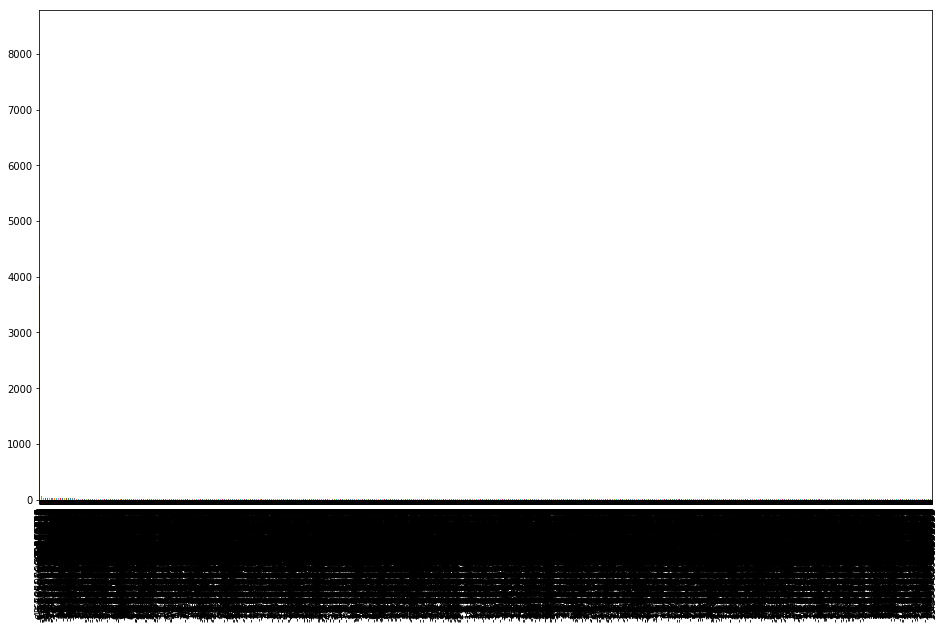

In [8]:
plt.figure(figsize=(16, 9))


report[c].value_counts(dropna=False).plot.bar()

## 4. Time series to supervised problem

In [36]:
# https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
		data: Sequence of observations as a DataFrame.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
    n_vars = data.size
    df = data
    cols = pd.DataFrame()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        name = 'var(t-{})'.format(i)
        cols[name] = df.shift(i)
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        
        if i == 0:
            name = 'var(t)'
        else:
            name = 'var(t+{})'.format(i)
            
        cols[name] = df.shift(-i)
    
    # drop rows with NaN values
    if dropnan:
        cols.dropna(inplace=True)
    return cols

data = pd.DataFrame()
    
data['t'] = report['Rentab. dia']

data['t+1'] = data['t'].shift(-1)
    

data = series_to_supervised(report['Rentab. dia'], 2)

data.head()


,var(t-2),var(t-1),var(t)
2,-19.3997,6.87291,7.13263
3,6.87291,7.13263,7.07908
4,7.13263,7.07908,6.97033
5,7.07908,6.97033,7.02557
6,6.97033,7.02557,7.18621
